## This notebook should be launched after "Analys_whole_fold_regressed.ipynb" to make last figures

In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from os.path import join as opj
from scipy.stats import ttest_ind
import nibabel as nib
import nilearn
import tqdm
import glob
import os
from nilearn import image
from nilearn import plotting

# 0. Load all ML metrics in MNI space and create plots

In [62]:
base_data_path="models_regressed"

df_list=[]
for fold in [0,1,2,3,4]:

    fold_dir=f"models_regressed/unet_t12pet_fold_{fold}"

    df=pd.read_csv(opj(fold_dir,"metrics.csv")).fillna(df.median())
    df_list.append(df)

/tmp/ipykernel_709270/1507856634.py:8: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=pd.read_csv(opj(fold_dir,"metrics.csv")).fillna(df.median())
/tmp/ipykernel_709270/1507856634.py:8: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=pd.read_csv(opj(fold_dir,"metrics.csv")).fillna(df.median())
/tmp/ipykernel_709270/1507856634.py:8: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Selec

In [12]:
fold=0
print(f"[INFO] Running fold {fold}")

fold_dir=f"models_regressed/unet_t12pet_fold_{fold}"

df=pd.read_csv(opj(fold_dir,"metrics.csv")).fillna(df.median())
df


[INFO] Running fold 0


/tmp/ipykernel_709270/864370589.py:6: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=pd.read_csv(opj(fold_dir,"metrics.csv")).fillna(df.median())


,index,region,label,mse,mse_smoothed,normdiff,normdiff_smoothed,cnr,cnr_smoothed,perc,perc_smoothed,corr
0,0,Left Cerebral White Matter,1,0.003065,0.002747,-0.015457,-0.011328,-0.081852,-0.081852,-0.053715,-0.051638,0.260558
1,1,Left Cerebral Cortex,2,0.003372,0.002925,-0.015457,-0.011328,0.018678,0.018678,-0.023041,-0.028188,0.333804
2,2,Left Lateral Ventricle,3,0.002217,0.001984,-0.060960,-0.043523,-0.282670,-0.282670,-0.127560,-0.108673,0.395957
3,3,Left Thalamus,4,0.004537,0.004016,-0.015457,-0.011328,-0.032265,-0.032265,-0.038943,-0.045191,0.188636
4,4,Left Caudate,5,0.002663,0.002369,-0.026187,-0.021418,-0.114219,-0.114219,-0.056795,-0.063347,0.314035
5,5,Left Putamen,6,0.003794,0.003436,-0.011023,-0.005986,0.001704,0.001704,-0.035326,-0.035823,0.270226
6,6,Left Pallidum,7,0.004063,0.003746,-0.004933,-0.001612,0.035418,0.035418,-0.021446,-0.025730,0.209413
7,7,Brain-Stem,8,0.004003,0.003449,-0.033981,-0.028443,-0.117034,-0.117034,-0.067722,-0.070656,0.280229
8,8,Left Hippocampus,9,0.003645,0.003230,-0.023258,-0.018358,-0.122838,-0.122838,-0.054676,-0.057056,0.234408
9,9,Left Amygdala,10,0.003531,0.003170,-0.010390,-0.005815,-0.025603,-0.025603,-0.026267,-0.030305,0.260853


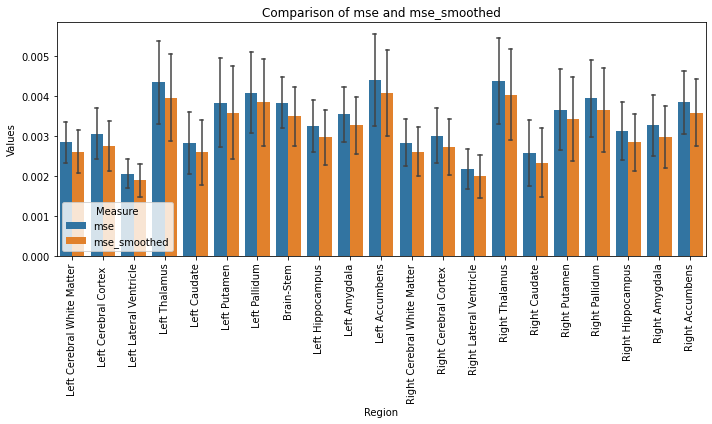

In [129]:

# Columns to plot
# columns_to_plot = ['mse', 'mse_smoothed', 'normdiff', 'normdiff_smoothed',
#                    'cnr', 'cnr_smoothed', 'perc', 'perc_smoothed', 'corr']

columns_to_plot=["mse", "mse_smoothed"]


# Assuming df_list is your list of dataframes

# Concatenate all the dataframes into one
df_all = pd.concat(df_list)

# Melt the dataframe to make it suitable for seaborn
df_all_melted = df_all.melt(id_vars=' region', value_vars=columns_to_plot)

# Use seaborn to create a barplot
plt.figure(figsize=(10,6))
plot=sns.barplot(data=df_all_melted, x=' region', y='value', hue='variable', capsize=.1, errorbar='sd',orient="v",errwidth=1.5)
# Rotate x-axis labels
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='center')


plt.title(f'Comparison of {columns_to_plot[0]} and {columns_to_plot[-1]}')
plt.ylabel('Values')
plt.xlabel('Region')
plt.legend(title='Measure')


# Perform t-test and add asterisks
for label in df_all[' region'].unique():
    first = df_all.loc[df_all[' region'] == label, columns_to_plot[0]]
    second = df_all.loc[df_all[' region'] == label, columns_to_plot[1]]
    _, p_value = ttest_ind(first, second)
    if p_value < 0.05:
        # Add asterisk
        x = df_all[' region'].unique().tolist().index(label)
        y = max(first.max(), second.max())
        plt.text(x, y, '*', ha='center')

plt.tight_layout()

plt.savefig("figures/regressed_out_mse.png")
plt.show()


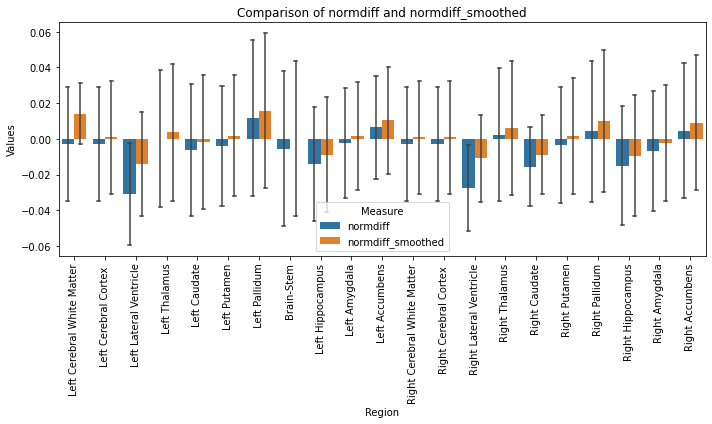

In [128]:

columns_to_plot=['normdiff', 'normdiff_smoothed']


# Assuming df_list is your list of dataframes

# Concatenate all the dataframes into one
df_all = pd.concat(df_list)

# Melt the dataframe to make it suitable for seaborn
df_all_melted = df_all.melt(id_vars=' region', value_vars=columns_to_plot)

# Use seaborn to create a barplot
plt.figure(figsize=(10,6))
plot=sns.barplot(data=df_all_melted, x=' region', y='value', hue='variable', capsize=.1, errorbar='sd',orient="v",errwidth=1.5)
# Rotate x-axis labels
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='center')


plt.title(f'Comparison of {columns_to_plot[0]} and {columns_to_plot[-1]}')
plt.ylabel('Values')
plt.xlabel('Region')
plt.legend(title='Measure')


# Perform t-test and add asterisks
for label in df_all[' region'].unique():
    first = df_all.loc[df_all[' region'] == label, columns_to_plot[0]]
    second = df_all.loc[df_all[' region'] == label, columns_to_plot[1]]
    _, p_value = ttest_ind(first, second)
    if p_value < 0.05:
        # Add asterisk
        x = df_all[' region'].unique().tolist().index(label)
        y = max(first.max(), second.max())
        plt.text(x, y, '*', ha='center')


plt.tight_layout()
plt.savefig("figures/regressed_out_normdiff.png")

plt.show()


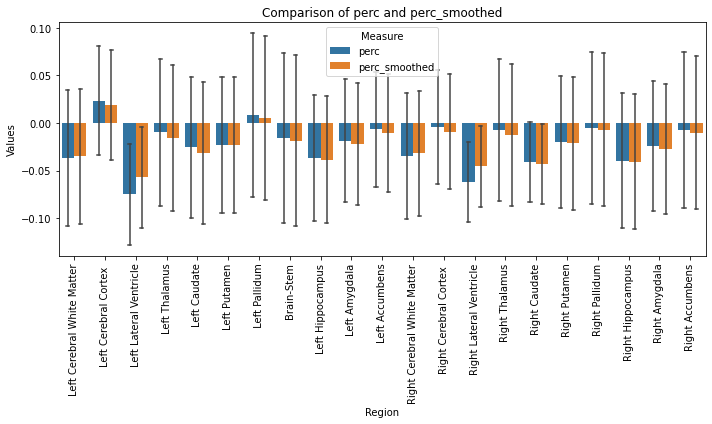

In [130]:
# Set the 'region' column as the index (optional if 'region' is already the index)
# df.set_index(' region', inplace=True)

# Columns to plot
# columns_to_plot = ['mse', 'mse_smoothed', 'normdiff', 'normdiff_smoothed',
#                    'cnr', 'cnr_smoothed', 'perc', 'perc_smoothed', 'corr']

columns_to_plot=['perc', 'perc_smoothed']

# Assuming df_list is your list of dataframes

# Concatenate all the dataframes into one
df_all = pd.concat(df_list)

# Melt the dataframe to make it suitable for seaborn
df_all_melted = df_all.melt(id_vars=' region', value_vars=columns_to_plot)

# Use seaborn to create a barplot
plt.figure(figsize=(10,6))
plot=sns.barplot(data=df_all_melted, x=' region', y='value', hue='variable', capsize=.1, errorbar='sd',orient="v",errwidth=1.5)
# Rotate x-axis labels
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='center')


plt.title(f'Comparison of {columns_to_plot[0]} and {columns_to_plot[-1]}')
plt.ylabel('Values')
plt.xlabel('Region')
plt.legend(title='Measure')


# Perform t-test and add asterisks
for label in df_all[' region'].unique():
    first = df_all.loc[df_all[' region'] == label, columns_to_plot[0]]
    second = df_all.loc[df_all[' region'] == label, columns_to_plot[1]]
    _, p_value = ttest_ind(first, second)
    if p_value < 0.05:
        # Add asterisk
        x = df_all[' region'].unique().tolist().index(label)
        y = max(first.max(), second.max())
        plt.text(x, y, '*', ha='center')

plt.tight_layout()

plt.savefig("figures/regressed_out_perc.png")
plt.show()



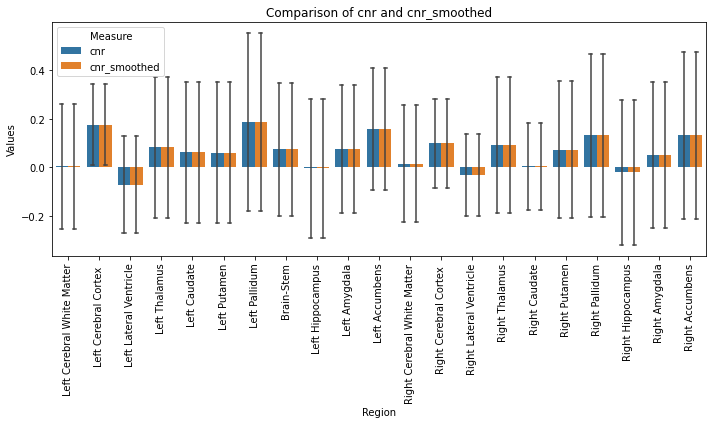

In [131]:
# Set the 'region' column as the index (optional if 'region' is already the index)
# df.set_index(' region', inplace=True)

# Columns to plot
# columns_to_plot = ['mse', 'mse_smoothed', 'normdiff', 'normdiff_smoothed',
#                    'cnr', 'cnr_smoothed', 'perc', 'perc_smoothed', 'corr']

columns_to_plot=['cnr', 'cnr_smoothed']

# Assuming df_list is your list of dataframes

# Concatenate all the dataframes into one
df_all = pd.concat(df_list)

# Melt the dataframe to make it suitable for seaborn
df_all_melted = df_all.melt(id_vars=' region', value_vars=columns_to_plot)

# Use seaborn to create a barplot
plt.figure(figsize=(10,6))
plot=sns.barplot(data=df_all_melted, x=' region', y='value', hue='variable', capsize=.1, errorbar='sd',orient="v",errwidth=1.5)
# Rotate x-axis labels
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='center')


plt.title(f'Comparison of {columns_to_plot[0]} and {columns_to_plot[-1]}')
plt.ylabel('Values')
plt.xlabel('Region')
plt.legend(title='Measure')


# Perform t-test and add asterisks
for label in df_all[' region'].unique():
    first = df_all.loc[df_all[' region'] == label, columns_to_plot[0]]
    second = df_all.loc[df_all[' region'] == label, columns_to_plot[1]]
    _, p_value = ttest_ind(first, second)
    if p_value < 0.05:
        # Add asterisk
        x = df_all[' region'].unique().tolist().index(label)
        y = max(first.max(), second.max())
        plt.text(x, y, '*', ha='center')

plt.tight_layout()

plt.savefig("figures/regressed_out_cnr.png")
plt.show()


## 1. Global metrics

In [116]:


# Concatenate all the dataframes into one
df_all = pd.concat(df_list)

# Compute the mean and standard deviation for each column
mean_values = df_all.mean()
std_values = df_all.std()

# Combine these series into a dataframe
result = pd.DataFrame({
    'mean': mean_values,
    'std': std_values
})

result

/tmp/ipykernel_709270/1538845081.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = df_all.mean()
/tmp/ipykernel_709270/1538845081.py:6: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std_values = df_all.std()


,mean,std
index,10.000000,6.084343
label,11.000000,6.084343
mse,0.003370,0.001000
mse_smoothed,0.003099,0.000996
normdiff,-0.005465,0.032198
normdiff_smoothed,0.000970,0.031152
cnr,0.064663,0.252183
cnr_smoothed,0.064663,0.252183
perc,-0.021886,0.065799
perc_smoothed,-0.022622,0.064534


In [122]:
result.to_csv("models_regressed/results.csv")

## 2. Load images for figures

In [151]:
fold_dir="models_regressed/unet_t12pet_fold_0/generated/structural"
label_dict={"HC":0, "CLB":1, "KOA":2}
inverse_label_dict={v:k for k,v in label_dict.items()}

In [152]:
os.listdir(fold_dir)

['KOA', 'CLB', 'HC']

In [178]:
inputs = [] 
references = []
populations = []
outputs = []
masks = []
filenames=[]

for pop in ["KOA","CLB","HC"]:
    x=os.listdir(opj(fold_dir,pop))
    filenames=[i for i in x if ".nii.gz" in i]
    populations+=[pop]*len(filenames)
    inputs+=[opj(fold_dir,pop,i) for i in filenames]
    references+=[opj(fold_dir,pop,i).replace("structural","original") for i in filenames]
    outputs+=[opj(fold_dir,pop,i).replace("structural","converted") for i in filenames]
    
        
# print(filenames)
        
        
    
# # Get list of image paths
# structural_paths = glob.glob("models_regressed/unet_t12pet_fold_0/structural/*.nii.gz") 
# pet_paths = glob.glob("models_regressed/unet_t12pet_fold_0/*.nii.gz")




In [312]:
rnd_idx=np.random.randint(len(inputs))

example_t1=inputs[rnd_idx]
example_pet_pred=outputs[rnd_idx]
example_pet_true=references[rnd_idx]
pop=populations[rnd_idx]
print(pop)
example_t1_nib=nib.load(example_t1)
example_pet_pred_nib=nib.load(example_pet_pred)
example_pet_true_nib=nib.load(example_pet_true)
# 
example_pet_true_smoothed_nib = image.smooth_img(example_pet_true_nib, 4)

CLB


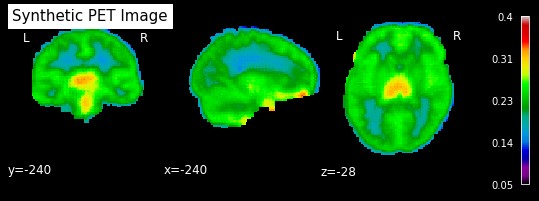

In [313]:
plotting.plot_epi(example_pet_pred_nib,title=f"Synthetic PET Image", cut_coords=[-240,-240,-28],colorbar=True, vmin=0.05,vmax=0.4,draw_cross=False)

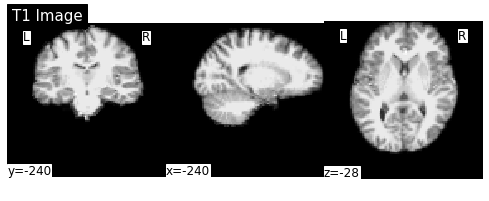

In [314]:
plotting.plot_img(example_t1_nib,title=f"T1 Image",cmap="gray",cut_coords=[-240,-240,-28],draw_cross=False,output_file=f"figures/structural_{rnd_idx}.png")
plotting.plot_img(example_t1_nib,title=f"T1 Image",cmap="gray",cut_coords=[-240,-240,-28],draw_cross=False)

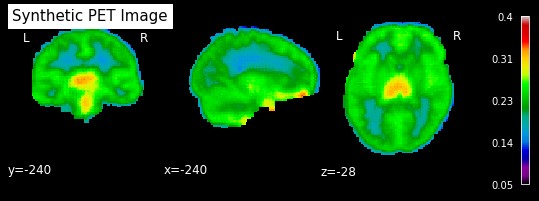

In [315]:
plotting.plot_epi(example_pet_pred_nib,title=f"Synthetic PET Image", cut_coords=[-240,-240,-28],colorbar=True, vmin=0.05,vmax=0.4,draw_cross=False,output_file=f"figures/synthetic_{rnd_idx}.png")
plotting.plot_epi(example_pet_pred_nib,title=f"Synthetic PET Image", cut_coords=[-240,-240,-28],colorbar=True, vmin=0.05,vmax=0.4,draw_cross=False)

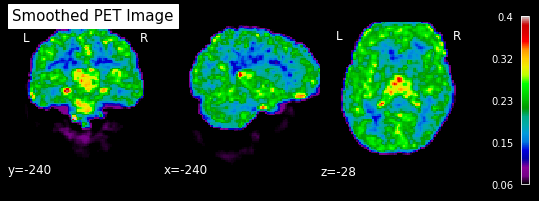

In [319]:
plotting.plot_epi(example_pet_true_smoothed_nib,title=f"Smoothed PET Image", cut_coords=[-240,-240,-28],colorbar=True,vmin=0.06,vmax=0.4,draw_cross=False,black_bg=True,output_file=f"figures/original_smoothed_{rnd_idx}.png")
plotting.plot_epi(example_pet_true_smoothed_nib,title=f"Smoothed PET Image", cut_coords=[-240,-240,-28],colorbar=True,vmin=0.06,vmax=0.4,draw_cross=False,black_bg=True)

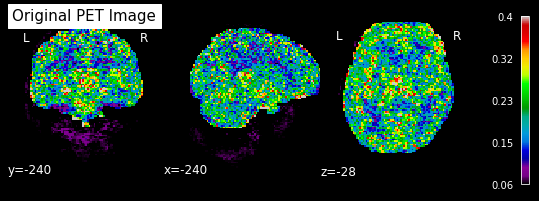

In [320]:
plotting.plot_epi(example_pet_true,title=f"Original PET Image", cut_coords=[-240,-240,-28],colorbar=True,vmin=0.06,vmax=0.4,draw_cross=False,output_file=f"figures/original_{rnd_idx}.png")
plotting.plot_epi(example_pet_true,title=f"Original PET Image", cut_coords=[-240,-240,-28],colorbar=True,vmin=0.06,vmax=0.4,draw_cross=False)

In [321]:
rnd_idx

35